## Import packages and visualization
If you imported extra packages, please mention in your report.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess, line_search, minimize_scalar
# rosen, rosen_der, rosen_hess is the built-in Rosenborck function and its first and second order derivative

In [ ]:
def visualize(x_iter):
    x0_iter = np.array([i[0] for i in x_iter])
    x1_iter = np.array([i[1] for i in x_iter])
    x = np.linspace(-2,2,1000)
    y = np.linspace(-1,3,1000)
    X, Y = np.meshgrid(x, y)
    Z = rosen([X,Y])

    anglesx = x0_iter[1:] - x0_iter[:-1]
    anglesy = x1_iter[1:] - x1_iter[:-1]

    %matplotlib inline
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z, 50, cmap = 'jet')
    ax.set_title('Contour')
    for i in x_iter:
        ax.scatter(i[0],i[1],color = 'r', marker = '.')

    for i in range(len(x_iter)-1):
        ax.quiver(x_iter[i][0], x_iter[i][1], anglesx[i], anglesy[i], scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)

    plt.show()

## BFGS

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 42


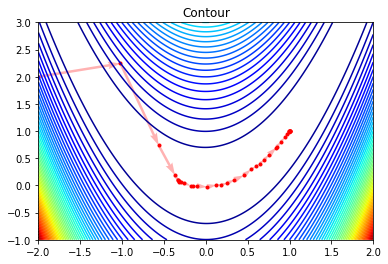

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess
# rosen, rosen_der, rosen_hess is the built-in Rosenborck function and its first and second order derivative

def visualize(x_iter):
    x0_iter = np.array([i[0] for i in x_iter])
    x1_iter = np.array([i[1] for i in x_iter])
    x = np.linspace(-2,2,1000)
    y = np.linspace(-1,3,1000)
    X, Y = np.meshgrid(x, y)
    Z = rosen([X,Y])

    anglesx = x0_iter[1:] - x0_iter[:-1]
    anglesy = x1_iter[1:] - x1_iter[:-1]

    %matplotlib inline
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z, 50, cmap = 'jet')
    ax.set_title('Contour')
    for i in x_iter:
        ax.scatter(i[0],i[1],color = 'r', marker = '.')

    for i in range(len(x_iter)-1):
        ax.quiver(x_iter[i][0], x_iter[i][1], anglesx[i], anglesy[i], scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)

    plt.show()
    
def record(x):
    x_iter.append(x);
    
x0 = np.array([-2,2])
x_iter = list()

res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
               options={'disp': True},callback=record)
x_iter.insert(0,x0)
visualize(x_iter)

## Conjugate Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 32
         Function evaluations: 78
         Gradient evaluations: 76


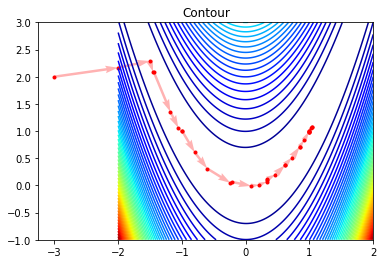

In [ ]:
def record(x):
    x_iter.append(x);
    
x0 = np.array([-3,2])
x_iter = list()

res = minimize(rosen, x0, method='CG', jac=rosen_der,
               options={'disp': True},callback=record)
x_iter.insert(0,x0)
visualize(x_iter)

## Gradient Descent with optimal step length

In [ ]:
def Gradient_Descent(Grad, x, epsilon=0.00001, nMax = 100000):
    x_i, y_i = x
    all_x_i = list()
    all_y_i = list()
    all_f_i = list()
    x_iter = list()
    step_length = list()
    iter_count = 0
    x_iter.append([x_i, y_i])
    for i in range(1, nMax):
        all_x_i.append(x_i)
        all_y_i.append(y_i)
        all_f_i.append(rosen([x_i, y_i]))
        dx_i, dy_i = Grad(np.asarray([x_i, y_i]))
        '''step = line_search(rosen, Grad,
                                np.r_[x_i, y_i], -np.r_[dx_i, dy_i],
                                np.r_[dx_i, dy_i], c2=.05)'''
        step = minimize_scalar(lambda alpha: rosen(x_i - alpha * Grad(x_i), y_i - alpha* Grad(y_i)))
        step = step.x
        #step = step[0]
        if step == None:
          step = 0.001
        step_length.append(step)
        x_i -=  step * dx_i
        y_i -=  step * dy_i
        if i % 100 == 0:
          x_iter.append([x_i, y_i])
        iter_count += 1
        if np.abs(all_f_i[-1]) < epsilon:
            break
    print('total iter:', iter_count)
    return x_iter, iter_count, step_length, all_f_i[-1]

In [ ]:
x0 = np.array([-2, 2])
x_iter, iter_count, step_length, final_loss = Gradient_Descent(rosen_der, x0)
print('final_loss: ', final_loss)
print('step history:', step_length)
visualize(x_iter)

IndexError: ignored

## Pure Newton's Method

Iteration Count: 5



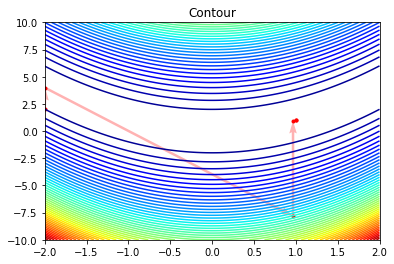

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess
# rosen, rosen_der, rosen_hess is the built-in Rosenborck function and its first and second order derivative

def visualize(x_iter):
    x0_iter = np.array([i[0] for i in x_iter])
    x1_iter = np.array([i[1] for i in x_iter])
    x = np.linspace(-2,2,1000)
    y = np.linspace(-10,10,1000)
    X, Y = np.meshgrid(x, y)
    Z = rosen([X,Y])

    anglesx = x0_iter[1:] - x0_iter[:-1]
    anglesy = x1_iter[1:] - x1_iter[:-1]

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z, 50, cmap = 'jet')
    ax.set_title('Contour')
    for i in x_iter:
        ax.scatter(i[0],i[1],color = 'r', marker = '.')

    for i in range(len(x_iter)-1):
        ax.quiver(x_iter[i][0], x_iter[i][1], anglesx[i], anglesy[i], scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)

    plt.show()

def Newton(Grad, Grad2, x, epsilon=0.00001, nMax = 10000 ):
    x_iter=list()
    x_iter.append(x)
    iter_count = 0

    for i in range(1000):
        temp = x
        hess = np.linalg.inv(Grad2(x))
        p = hess.dot(Grad(x))
        x = x - p
        e = temp - x
        error = (e[0]*e[0] + e[1]*e[1])**0.5
        if (error <epsilon):
            break
        iter_count +=1
        x_iter.append(x)
    return x_iter, iter_count    

x0 = np.array([-2,2])
x_iter, iter_count = Newton(rosen_der,rosen_hess,x0)
print('Iteration Count: %d\n' % iter_count)
visualize(x_iter)

## Modified Newton's method with conjugate gradiet (Newton-CG)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 277
         Function evaluations: 298
         Gradient evaluations: 574
         Hessian evaluations: 277


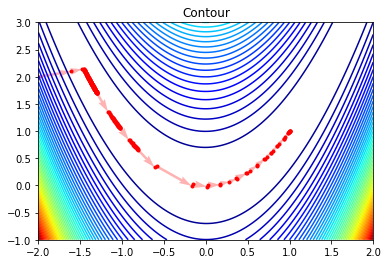

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess
# rosen, rosen_der, rosen_hess is the built-in Rosenborck function and its first and second order derivative

def visualize(x_iter):
    x0_iter = np.array([i[0] for i in x_iter])
    x1_iter = np.array([i[1] for i in x_iter])
    x = np.linspace(-2,2,1000)
    y = np.linspace(-1,3,1000)
    X, Y = np.meshgrid(x, y)
    Z = rosen([X,Y])

    anglesx = x0_iter[1:] - x0_iter[:-1]
    anglesy = x1_iter[1:] - x1_iter[:-1]

    %matplotlib inline
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z, 50, cmap = 'jet')
    ax.set_title('Contour')
    for i in x_iter:
        ax.scatter(i[0],i[1],color = 'r', marker = '.')

    for i in range(len(x_iter)-1):
        ax.quiver(x_iter[i][0], x_iter[i][1], anglesx[i], anglesy[i], scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)

    plt.show()
    
def record(x):
    x_iter.append(x);
    
x0 = np.array([-2,2])
x_iter = list()

res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hess=rosen_hess,
               options={'xtol': 1e-8, 'disp': True},callback=record)
x_iter.insert(0,x0)
visualize(x_iter)